In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

In [77]:
train_data = pd.read_csv("Cleaned_dataset.csv\Cleaned_dataset.csv")
train_data.dropna(inplace=True)
train_data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [78]:
train_data['Destination'].value_counts()

Destination
Mumbai       82995
Delhi        77739
Bangalore    72344
Hyderabad    62539
Chennai      57589
Kolkata      54447
Ahmedabad    44435
Name: count, dtype: int64

In [79]:
train_data['Journey_date'] = pd.to_datetime(train_data['Date_of_journey'],format='%Y-%m-%d').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_journey'],format='%Y-%m-%d').dt.month

train_data.drop('Date_of_journey',inplace=True,axis=1)

train_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_date,Journey_month
0,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,16,1
1,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,16,1
2,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,16,1
3,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,16,1
4,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,16,1


In [80]:
train_data['Journey_day'].replace({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6},inplace=True)
train_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_date,Journey_month
0,0,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,16,1
1,0,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,16,1
2,0,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,16,1
3,0,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,16,1
4,0,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,16,1


In [81]:
Dep = train_data[['Departure']]
Dep = pd.get_dummies(Dep,drop_first=True)
Dep.head()

,Departure_6 AM - 12 PM,Departure_After 6 PM,Departure_Before 6 AM
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [82]:
Dep.sample(10)

,Departure_6 AM - 12 PM,Departure_After 6 PM,Departure_Before 6 AM
326050,False,False,False
318891,False,False,False
128207,True,False,False
322247,True,False,False
330204,True,False,False
322368,True,False,False
4488,True,False,False
110682,False,True,False
217629,False,False,True
285687,True,False,False


In [83]:
train_data['Total_stops'].replace({'non-stop':0,'1-stop':1,'2+-stop':2},inplace=True)
train_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_date,Journey_month
0,0,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5335,16,1
1,0,Indigo,6E-2519,Economy,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.3333,1,5899,16,1
2,0,GO FIRST,G8-354,Economy,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.1667,1,5801,16,1
3,0,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5794,16,1
4,0,Air India,AI-805,Economy,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.1667,1,5955,16,1


In [84]:
train_data['Class'].replace({'Economy':0,'Business':1,'Premium Economy':2,'First':3},inplace=True)
train_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_date,Journey_month
0,0,SpiceJet,SG-8169,0,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5335,16,1
1,0,Indigo,6E-2519,0,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.3333,1,5899,16,1
2,0,GO FIRST,G8-354,0,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.1667,1,5801,16,1
3,0,SpiceJet,SG-8709,0,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5794,16,1
4,0,Air India,AI-805,0,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.1667,1,5955,16,1


In [85]:
Arr = train_data['Arrival']
Arr = pd.get_dummies(Arr,drop_first=True)
Arr.head()

,6 AM - 12 PM,After 6 PM,Before 6 AM
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [86]:
train_data['Arrival'].value_counts()

Arrival
After 6 PM      200266
6 AM - 12 PM    119644
12 PM - 6 PM    101413
Before 6 AM      30765
Name: count, dtype: int64

In [87]:
train_data['Class'].value_counts()

Class
0    252033
1    126834
2     73077
3       144
Name: count, dtype: int64

In [88]:
destination = train_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True


In [89]:
source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Bangalore,Source_Chennai,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_Mumbai
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [90]:
train_data.sample(10)

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_date,Journey_month
29383,1,AirAsia,I5-552,0,Delhi,6 AM - 12 PM,1,After 6 PM,Bangalore,7.2500,30,7875,14,2
391981,0,Indigo,6E-189,0,Chennai,After 6 PM,1,Before 6 AM,Kolkata,6.6667,8,7182,23,1
387100,1,Indigo,6E-6239,0,Chennai,12 PM - 6 PM,0,12 PM - 6 PM,Hyderabad,1.2500,30,4573,14,2
425049,3,GO FIRST,G8-537,0,Ahmedabad,After 6 PM,1,6 AM - 12 PM,Bangalore,11.2500,11,5688,26,1
233957,5,Vistara,UK-802,0,Bangalore,After 6 PM,1,6 AM - 12 PM,Ahmedabad,13.3333,27,7962,11,2
100946,4,Vistara,UK-507,0,Mumbai,12 PM - 6 PM,0,After 6 PM,Bangalore,1.3333,5,6605,20,1
85555,6,Vistara,UK-771,0,Mumbai,6 AM - 12 PM,1,After 6 PM,Delhi,14.0833,7,18753,22,1
380422,3,Vistara,UK-832,1,Chennai,6 AM - 12 PM,1,12 PM - 6 PM,Bangalore,9.9167,32,60420,16,2
137789,3,Vistara,UK-910,1,Mumbai,12 PM - 6 PM,1,6 AM - 12 PM,Kolkata,16.0000,32,84434,16,2
4936,6,Air India,AI-544,0,Delhi,12 PM - 6 PM,1,6 AM - 12 PM,Mumbai,17.0833,14,11205,29,1


In [91]:
data_train = pd.concat([train_data,Arr,Dep,source,destination],axis=1)
data_train.drop(['Source','Destination','Arrival','Departure'],axis=1,inplace=True)
data_train.head()

,Journey_day,Airline,Flight_code,Class,Total_stops,Duration_in_hours,Days_left,Fare,Journey_date,Journey_month,...,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,SpiceJet,SG-8169,0,0,2.0833,1,5335,16,1,...,True,False,False,False,False,False,False,False,False,True
1,0,Indigo,6E-2519,0,0,2.3333,1,5899,16,1,...,True,False,False,False,False,False,False,False,False,True
2,0,GO FIRST,G8-354,0,0,2.1667,1,5801,16,1,...,True,False,False,False,False,False,False,False,False,True
3,0,SpiceJet,SG-8709,0,0,2.0833,1,5794,16,1,...,True,False,False,False,False,False,False,False,False,True
4,0,Air India,AI-805,0,0,2.1667,1,5955,16,1,...,True,False,False,False,False,False,False,False,False,True


In [92]:
data_train = data_train.drop(['Airline', 'Flight_code'], axis = 1)

In [93]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Journey_day             452088 non-null  int64  
 1   Class                   452088 non-null  int64  
 2   Total_stops             452088 non-null  int64  
 3   Duration_in_hours       452088 non-null  float64
 4   Days_left               452088 non-null  int64  
 5   Fare                    452088 non-null  int64  
 6   Journey_date            452088 non-null  int32  
 7   Journey_month           452088 non-null  int32  
 8   6 AM - 12 PM            452088 non-null  bool   
 9   After 6 PM              452088 non-null  bool   
 10  Before 6 AM             452088 non-null  bool   
 11  Departure_6 AM - 12 PM  452088 non-null  bool   
 12  Departure_After 6 PM    452088 non-null  bool   
 13  Departure_Before 6 AM   452088 non-null  bool   
 14  Source_Bangalore    

In [94]:
df = data_train
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Fare"])  # Features
y = df["Fare"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Create regression matrices
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [96]:
labels = dtrain_reg.get_label()
data = dtrain_reg.get_data()

print("Labels:")
print(labels)
print("\nData:")
print(data)
type(dtrain_reg)

Labels:
[ 7628. 17919. 10513. ... 17458. 16394. 14714.]

Data:
  (0, 0)	4.0
  (0, 1)	0.0
  (0, 2)	1.0
  (0, 3)	21.8333
  (0, 4)	47.0
  (0, 5)	3.0
  (0, 6)	3.0
  (0, 7)	1.0
  (0, 8)	0.0
  (0, 9)	0.0
  (0, 10)	0.0
  (0, 11)	0.0
  (0, 12)	0.0
  (0, 13)	0.0
  (0, 14)	0.0
  (0, 15)	0.0
  (0, 16)	1.0
  (0, 17)	0.0
  (0, 18)	0.0
  (0, 19)	0.0
  (0, 20)	1.0
  (0, 21)	0.0
  (0, 22)	0.0
  (0, 23)	0.0
  (0, 24)	0.0
  :	:
  (361669, 0)	3.0
  (361669, 1)	2.0
  (361669, 2)	1.0
  (361669, 3)	13.6667
  (361669, 4)	25.0
  (361669, 5)	9.0
  (361669, 6)	2.0
  (361669, 7)	0.0
  (361669, 8)	0.0
  (361669, 9)	0.0
  (361669, 10)	0.0
  (361669, 11)	1.0
  (361669, 12)	0.0
  (361669, 13)	0.0
  (361669, 14)	0.0
  (361669, 15)	0.0
  (361669, 16)	0.0
  (361669, 17)	0.0
  (361669, 18)	1.0
  (361669, 19)	0.0
  (361669, 20)	0.0
  (361669, 21)	0.0
  (361669, 22)	1.0
  (361669, 23)	0.0
  (361669, 24)	0.0


xgboost.core.DMatrix

In [97]:
df['Total_stops'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452088 entries, 0 to 452087
Series name: Total_stops
Non-Null Count   Dtype
--------------   -----
452088 non-null  int64
dtypes: int64(1)
memory usage: 3.4 MB


In [98]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
n = 4600


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=100,
   early_stopping_rounds=100
)

[0]	validation-rmse:15185.10130	train-rmse:15175.06366
[100]	validation-rmse:5943.62211	train-rmse:5888.20824
[200]	validation-rmse:5588.57157	train-rmse:5478.19467
[300]	validation-rmse:5369.37111	train-rmse:5208.33903
[400]	validation-rmse:5230.34440	train-rmse:5030.08303
[500]	validation-rmse:5118.03201	train-rmse:4875.01191
[600]	validation-rmse:5038.75857	train-rmse:4752.11696
[700]	validation-rmse:4981.00958	train-rmse:4657.68346
[800]	validation-rmse:4931.43363	train-rmse:4572.89874
[900]	validation-rmse:4895.78794	train-rmse:4508.10502
[1000]	validation-rmse:4861.97131	train-rmse:4444.09181
[1100]	validation-rmse:4837.03439	train-rmse:4390.32673
[1200]	validation-rmse:4814.52207	train-rmse:4338.17473
[1300]	validation-rmse:4791.93465	train-rmse:4287.02705
[1400]	validation-rmse:4770.08027	train-rmse:4242.41173
[1500]	validation-rmse:4749.15642	train-rmse:4199.46777
[1600]	validation-rmse:4730.93167	train-rmse:4157.32473
[1700]	validation-rmse:4720.75414	train-rmse:4121.78526
[1

In [99]:
# model.fit(X_train,y_train)

y_pred=model.predict(dtest_reg)


In [100]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(" Root Mean Squared Error (RMSE):",627.5058588364545)
print(" r2 :", metrics.r2_score(y_test,y_pred))

 Root Mean Squared Error (RMSE): 627.5058588364545
 r2 : 0.9481865420094817


<Axes: xlabel='Fare'>

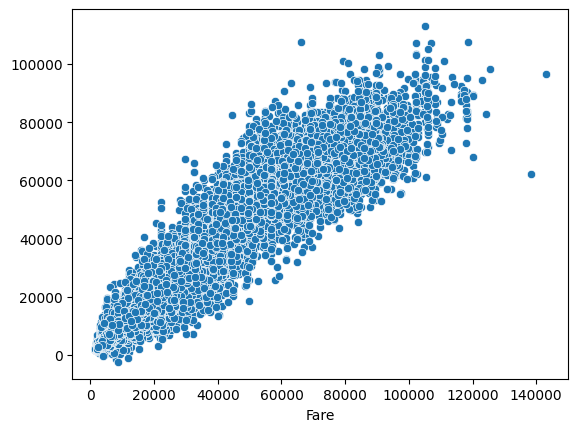

In [101]:
import seaborn as sns
color_dict = {1:'red', 2:'blue'}
sns.scatterplot(x=y_test, y=y_pred)

In [102]:
df.to_csv('Encoded.csv', index = False)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Journey_day             452088 non-null  int64  
 1   Class                   452088 non-null  int64  
 2   Total_stops             452088 non-null  int64  
 3   Duration_in_hours       452088 non-null  float64
 4   Days_left               452088 non-null  int64  
 5   Journey_date            452088 non-null  int32  
 6   Journey_month           452088 non-null  int32  
 7   6 AM - 12 PM            452088 non-null  bool   
 8   After 6 PM              452088 non-null  bool   
 9   Before 6 AM             452088 non-null  bool   
 10  Departure_6 AM - 12 PM  452088 non-null  bool   
 11  Departure_After 6 PM    452088 non-null  bool   
 12  Departure_Before 6 AM   452088 non-null  bool   
 13  Source_Bangalore        452088 non-null  bool   
 14  Source_Chennai      

In [104]:
import joblib
# file = open(, 'wb')
joblib.dump(model, 'flight_xgb.pkl')

['flight_xgb.pkl']

Mean Absolute Error (MAE): 2712.37
Mean Squared Error (MSE): 21381705.97
Root Mean Squared Error (RMSE): 4624.04
R-squared (R2): 0.95


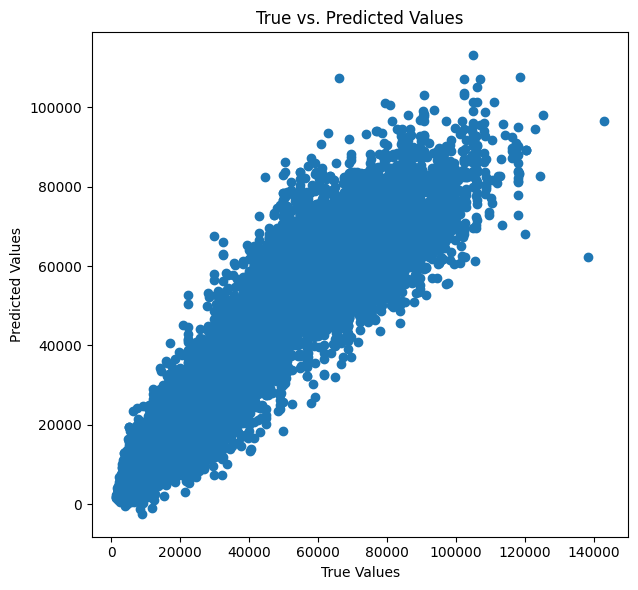

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Fit your machine learning model

# Make predictions on the test se

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create visualizations
plt.figure(figsize=(12, 6))

# Scatter plot of true vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Display performance metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

plt.tight_layout()
plt.show()

In [106]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()

# Fit the model to the data
model3.fit(X_train, y_train)

# Make predictions
y_pred2 = model3.predict(X_test)

r2 = r2_score(y_test, y_pred2)
print(r2)



0.19336280805550365
